<a href="https://colab.research.google.com/github/Frans-Grau/Project-4_WebScraping/blob/main/F-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
### Imports
import pandas as pd
import numpy as np
from unicodedata import normalize
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
### Data upload - csv database
unicorns = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Project-4_WebScraping/main/Database/List%20of%20Unicorns.csv')

In [3]:
### Data upload - wikipedia database
table_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies')
wiki_unicorns = table_wiki[2]
#wiki_unicorns.to_pickle('wiki_unicorns.pickle')

### EDA - Unicorns File (downloaded database)

In [4]:
unicorns = unicorns.drop(['No.','Unnamed: 6','Unnamed: 7'], axis=1)
unicorns.head()

,Name,Industry,Country,Valuation ($ Billion),Key Investors
0,Bytedance,Artificial intelligence,China,140.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,Other,United States,100.3,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,E-commerce & direct-to-consumer,China,100.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,Fintech,United States,95.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,Fintech,Sweden,45.6,"Institutional Venture Partners, Sequoia Capita..."


In [34]:
unicorns

,Name,Country,Industry,Valuation ($ Billion)
0,Bytedance,China,Artificial intelligence,140.0
1,SpaceX,United States,Other,100.3
2,SHEIN,China,E-commerce & direct-to-consumer,100.0
3,Stripe,United States,Fintech,95.0
4,Klarna,Sweden,Fintech,45.6
...,...,...,...,...
1101,UPSIDE Foods,United States,Other,1.0
1102,Divergent 3D,United States,Auto & transportation,1.0
1103,Taxfix,Germany,Fintech,1.0
1104,Open,India,Fintech,1.0


In [73]:
one = pd.pivot_table(unicorns, index='Country', values='Valuation ($ Billion)', aggfunc='mean')
one = one.reset_index()


<AxesSubplot:xlabel='Country', ylabel='Valuation ($ Billion)'>

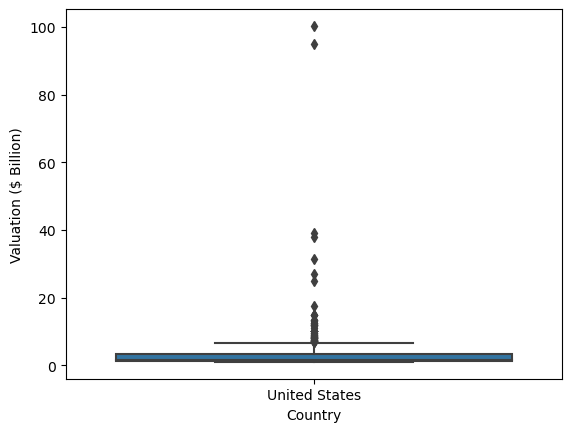

In [82]:
sns.boxplot(unicorns[unicorns['Country']=='United States'] , x = 'Country', y='Valuation ($ Billion)')

c:\Users\frans\anaconda3\envs\Data\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

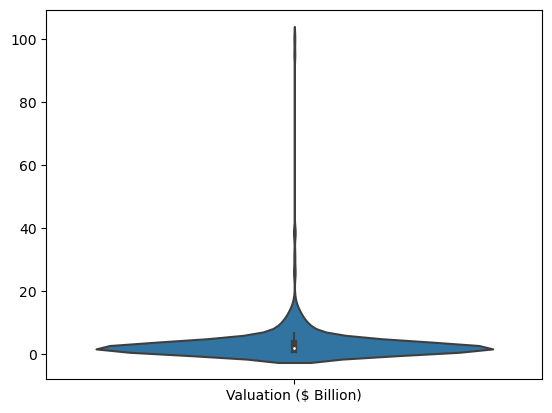

In [84]:
sns.violinplot(unicorns[unicorns['Country']=='United States'])

In [83]:
unicorns[unicorns['Country']=='United States'].describe()

,Valuation ($ Billion)
count,585.000000
mean,3.306496
std,6.700201
min,1.000000
25%,1.130000
50%,1.700000
75%,3.300000
max,100.300000


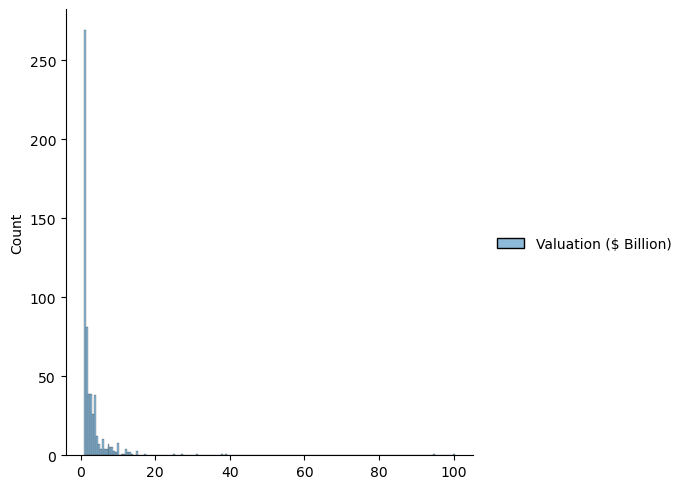

In [85]:
sns.displot(unicorns[unicorns['Country']=='United States'])

### EDA - Table Wiki

In [5]:
wiki_unicorns.head()

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,Stripe,95,June 2022[13],Financial services,US / Ireland,Patrick and John Collison
4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"


In [6]:
unicorns = unicorns.drop(['Key Investors'], axis = 1)
wiki_unicorns = wiki_unicorns.drop(['Valuation date','Founder(s)'], axis = 1)

In [7]:
unicorns = unicorns[['Name', 'Country','Industry','Valuation ($ Billion)']]
wiki_unicorns = wiki_unicorns[['Company','Country/ countries','Industry','Valuation (US$ billions)']]
print(unicorns.head(3))
print(wiki_unicorns.head(3))

        Name        Country                         Industry  \
0  Bytedance          China          Artificial intelligence   
1     SpaceX  United States                            Other   
2      SHEIN          China  E-commerce & direct-to-consumer   

   Valuation ($ Billion)  
0                  140.0  
1                  100.3  
2                  100.0  
     Company Country/ countries    Industry Valuation (US$ billions)
0  ByteDance              China    Internet                      140
1     SpaceX                 US   Aerospace                      127
2      Shein              China  E-commerce                      100


In [8]:
wiki_unicorns = wiki_unicorns.rename(columns ={'Valuation (US$ billions)':'Valuation ($ Billion)', 'Company':'Name', 'Country/ countries':'Country'})

In [90]:
wiki_unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   652 non-null    object
 1   Country                652 non-null    object
 2   Industry               587 non-null    object
 3   Valuation ($ Billion)  652 non-null    object
dtypes: object(4)
memory usage: 20.5+ KB


In [92]:
type(wiki_unicorns['Valuation ($ Billion)'][0])

str

In [89]:
sns.violinplot(data = wiki_unicorns, x = wiki_unicorns[wiki_unicorns['Country']=='United States'], y ='Valuation ($ Billion)')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
try2 = pd.concat([unicorns,wiki_unicorns], axis=0)
try2.reset_index(inplace=True)
try2 = try2.drop(['index'], axis = 1)

In [10]:
try2

,Name,Country,Industry,Valuation ($ Billion)
0,Bytedance,China,Artificial intelligence,140.0
1,SpaceX,United States,Other,100.3
2,SHEIN,China,E-commerce & direct-to-consumer,100.0
3,Stripe,United States,Fintech,95.0
4,Klarna,Sweden,Fintech,45.6
...,...,...,...,...
1753,Voi,Sweden,NaN,1+
1754,Neo Financial,Canada,Financial technology,1
1755,PhysicsWallah,India,Educational technology,1.1
1756,OneCard,India,Financial technology,1.4+


In [11]:
### Capitalize to check duplicates
### Check valuations and decide 


### Web Scraping - NomadNation

In [13]:
url = 'https://nomadlist.com/'
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')

<!DOCTYPE html>

<html class="htmlFunction pageType-cities filters-folded frontpage show-grid-side nomadlist no-js y new-user has-head-image grid-view pageType-cities X user units-metric" data-dark-mode="off" data-date="2022-11-30" lang="en-US"><script>var staticCacheBuster='2022-11-30';</script>
<head>
<meta charset="utf-8"/>
<script>
						/* load this stuff first b4 other JS cuz it's ESSENTIAL */
						var exchangeRatesSymbols = {"SATS":"\u738b","BTC":"m\u0e3f","ETH":"m\u039e","BDT":"\u09f3","NTD":"NT$","TRY":"\u20ba","MAD":".\u062f.\u0645.","AED":"\u062f.\u0625","ALL":"&#76;&#101;&#107;","AFN":"&#1547;","ARS":"Ar&#36;","AWG":"&#402;","AUD":"A&#36;","AZN":"&#1084;&#1072;&#1085;","BSD":"B&#36;","BBD":"Bds&#36;","BYR":"&#112;&#46;","BZD":"&#66;&#90;&#36;","BMD":"&#36;","BOB":"&#36;&#98;","BAM":"&#75;&#77;","BWP":"&#80;","BGN":"&#1083;&#1074;","BRL":"&#82;&#36;","BND":"B&#36;","KHR":"&#6107;","CAD":"C&#36;","KYD":"CI&#36;","CL":"CLP&#36;","CNY":"&#165;","COP":"CO&#36;","CRC":"&#8353;",
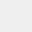

In [14]:
soup 

In [16]:
cities_grid = soup.find_all(class_='grid show view')

In [17]:
cities_grid

[<ul class="grid show view">
 <div class="aux-top-banner">
 </div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></div>
 <div class="item show show-now placeholder"></di

In [21]:
items = soup.find_all('li', {'data-type':'city'})
list(items)

[<li class="item show show-now {slugAsClassName} template" data-i="1" data-slug="{slug}" data-type="city">
 <div class="text">
 <h2 class="itemName">
 <a href="
 													{itemURL}
 						" title="{itemAlt}">
 {itemName} </a>
 </h2>
 <h3 class="itemSub">
 <a href="/country/{country-slug}" title="{itemSubAlt} for a Digital Nomad">
 {itemSub} </a>
 </h3>
 </div>
 {badge}
 <span class="click"></span>
 <img alt="{bgItemAlt}" class="bg lazyload" data-srcset="{bg-data-srcset}" sizes="25vw, (max-width:1000px) 33vw, (max-width:600px) 50vw" src="/assets/pixel.gif">
 <meta>
 <span class="action">
 <p class="description">
 {descriptionFromReview} </p>
 <span class="label-main-score label">
 {label-main-score}</span> 
 <span class="rating-main-score rating r{rating-main-score-r}"><span class="filling" style="width:{rating-main-score-width}">
 </span></span>
 <div class="clear"></div>
 <span class="label-cost-score label">💵 Cost </span>
 <span class="rating-cost-score rating r{rating-cost-score

In [30]:
# descriptions = soup.find('p',{'class':'description'})
# list(descriptions.get_text())

descriptions = list(map(lambda item: item.get_text(), soup.find_all('p',{'class':'description'})))
list(descriptions)

['\n{descriptionFromReview} ']

In [ ]:
### Import Selenium